# 로지스틱 회귀 모델
출처 : 딥러닝을 위한 수학(아카이시 마사노리 지음, 신상재 옮김, 위키북스, 2019.3.)

In [26]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# PDF 출력
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# 시그모이드 함수 그래프

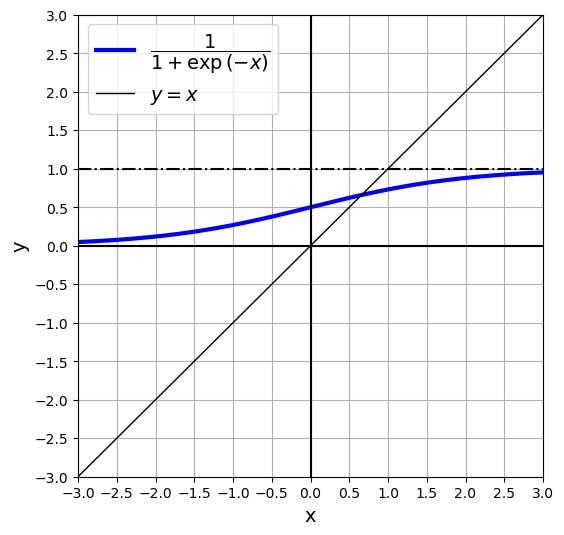

In [28]:
xx = np.linspace(-6, 6, 500)
yy = 1 / (np.exp(-xx) + 1)

plt.figure(figsize=(6,6))
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks(np.linspace(-3,3,13))
plt.yticks(np.linspace(-3,3,13))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.plot(xx, yy, c='b', label=r'$\dfrac{1}{1+\exp{(-x)}}$', lw=3)
plt.plot(xx, xx, c='k', label=r'$y = x$', lw=1)
plt.plot([-3,3], [0,0], c='k')
plt.plot([0,0], [-3,3],c='k')
plt.plot([-3,3],[1,1],linestyle='-.',c='k')
plt.legend(fontsize=14)
plt.show()

# 데이터 준비

In [29]:
# 학습용 데이터 준비

from sklearn.datasets import load_iris
iris = load_iris()
x_org = iris.data
y_org = iris.target
print('원본 데이터', x_org.shape, y_org.shape)

원본 데이터 (150, 4) (150,)


In [30]:
# 데이터 추출
#   클래스 0, 1만
#   항목 sepal_length과 sepal_width만

x_data = iris.data[:100,:2]
y_data = iris.target[:100]
print('대상 데이터', x_data.shape, y_data.shape)

대상 데이터 (100, 2) (100,)


In [31]:
# 더미 변수를 추가

x_data = np.insert(x_data, 0, 1.0, axis=1)
print('더미 변수를 추가 한 후', x_data.shape)

더미 변수를 추가 한 후 (100, 3)


In [32]:
# 원본 데이터의 크기

print(x_data.shape, y_data.shape)

# 학습 데이터, 검증 데이터로 분할 (셔플도 함께 실시)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=64, test_size=36, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 3) (100,)
(64, 3) (36, 3) (64,) (36,)


학습데이터의 산점도 표시

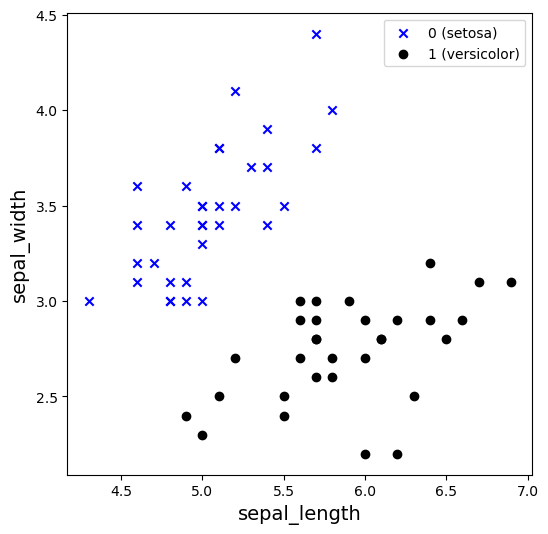

In [33]:
# 산점도 표시

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(fontsize=10)
plt.show()

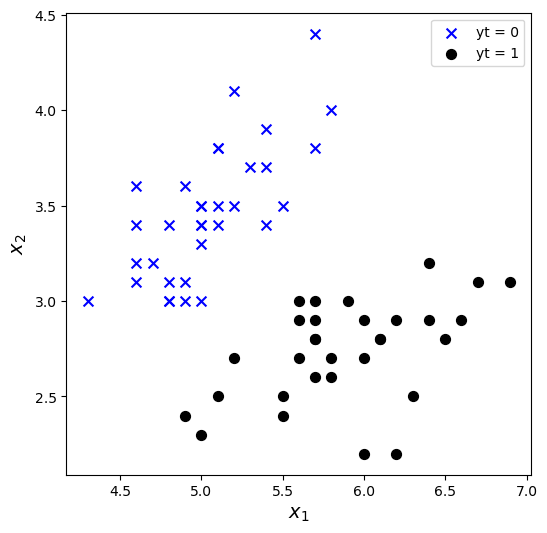

In [34]:
# 산점도 표시

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', s=50, c='b', label='yt = 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', s=50, c='k', label='yt = 1')
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(fontsize=10)
plt.show()

학습용 변수 설정

In [35]:
# 학습용 변수 설정

x = x_train
yt = y_train
print(x.shape)
print(yt.shape)

(64, 3)
(64,)


In [36]:
# 입력 데이터 x의 표시(더미 데이터를 포함) x=(x_0, x_1, x_2)

print(x[:5])
#print(x)

[[1.  5.7 3. ]
 [1.  6.2 2.9]
 [1.  6.  2.2]
 [1.  4.8 3. ]
 [1.  5.4 3.4]]


In [37]:
# 정답 데이터 y의 표시 yt = (0, 1, 0, 1, 1)

#print(yt[:5])
print(yt)

[1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1]


예측 함수

In [38]:
# 시그모이드 함수

def sigmoid(x):
    return 1/(1+ np.exp(-x))

### u = (w_0 * x_0) + (w_1 * x_1) + (w_2 * x_2) : u 값이 음수이면 class=0(setosa), 양수이면 class= 1(versicolor)

In [39]:
# class = 1에 속할 확률(예측값, predict) 계산 : yp = f(u) = 1/(1 + exp(-u)) 

def pred(x, w):
    return sigmoid(x @ w)                      # u = x @ w

평가

In [40]:
# 손실함수(교차 엔트로피 함수) : 로그 가능도 함수(경사하강법의 손실함수는 값을 최소화 하는 것이 목적이므로 -1을 곱함)

def cross_entropy(yt, yp):
    ce1 = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))          # 교차 엔트로피의 계산 (이 단계에서는 벡터)
    return(np.mean(ce1))                                          # 교차 엔트로피 벡터의 평균값을 계산

In [41]:
# 예측 결과의 확률값에서 0이나 1을 판단하는 함수

def classify(p):
    return np.where(p < 0.5, 0, 1)

In [42]:
# 모델을 평가하는 함수

from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    
    yp = pred(xt, w)                       # 예측값 계산
    
    loss = cross_entropy(yt, yp)           # 손실함수 값 계산
    
    yp_b = classify(yp)                    # 예측값(확률값)을 0이나 1로 변환
    
    score = accuracy_score(yt, yp_b)       # 정확도 산출
    return loss, score

초기화 처리

In [43]:
# 초기화 처리

M = x.shape[0]                             # 표본 수

D = x.shape[1]                             # 입력 차원수(더미 변수를 포함)

iters = 10000                              # 반복 횟수

alpha = 0.01                               # 학습률

w = np.ones(D)                             # 초깃값

history = np.zeros((0,3))                  # 평가 결과 기록(손실함수와 정확도)

print(w)
print(M)

[1. 1. 1.]
64


In [44]:
print(w @ x.T)
print(sigmoid(w @ x.T))

[ 9.7 10.1  9.2  8.8  9.8  9.   9.5  8.9  8.9 10.3  9.2  9.3 10.8 10.3
 10.3  9.4 10.6  8.8  9.   8.6  8.9  9.9  9.8  9.5 11.1  9.3 10.5  8.3
  9.2 10.1 10.5  9.9  9.5  8.7  9.5  9.   9.7 11.   9.4 10.   9.9  8.3
  9.5  9.5  8.9  9.5  9.5  9.3  9.4  8.9 10.   9.9  9.6  9.   9.9 10.3
  9.9  8.8 10.8  8.3  9.7  9.6  9.4  9.6]
[0.99993872 0.99995892 0.99989897 0.99984929 0.99994455 0.99987661
 0.99992515 0.99986363 0.99986363 0.99996637 0.99989897 0.99990858
 0.9999796  0.99996637 0.99996637 0.99991728 0.99997508 0.99984929
 0.99987661 0.99981593 0.99986363 0.99994983 0.99994455 0.99992515
 0.99998489 0.99990858 0.99997246 0.99975154 0.99989897 0.99995892
 0.99997246 0.99994983 0.99992515 0.99983344 0.99992515 0.99987661
 0.99993872 0.9999833  0.99991728 0.9999546  0.99994983 0.99975154
 0.99992515 0.99992515 0.99986363 0.99992515 0.99992515 0.99990858
 0.99991728 0.99986363 0.9999546  0.99994983 0.99993228 0.99987661
 0.99994983 0.99996637 0.99994983 0.99984929 0.9999796  0.99975154
 0.9

주요 처리

In [45]:
# 반복 루프

for k in range(iters):
        
    yp = pred(x, w)                         # 예측값 계산 (8.6.1), (8.6.2)
    
    yd = yp - yt                            # 오차 계산 (8.6.4)
    
    w = w - alpha * (x.T @ yd) / M         # 경사하강법 적용 (8.6.6) 


    # 평가 결과 기록
    if ( k % 10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, np.array([k, loss, score])))
        print( "iter = %d loss = %f score = %f" % (k, loss, score))
        
print("w0 = %f w1 = %f w2 = %f" % (w[0], w[1], w[2]))   

# iters =10000, w = [ 0.2832215   2.99129739 -5.35654621]
# iters = 7000, w = [ 0.356109    2.57969297 -4.65591823] 

iter = 0 loss = 4.300405 score = 0.527778
iter = 10 loss = 3.387649 score = 0.527778
iter = 20 loss = 2.481863 score = 0.527778
iter = 30 loss = 1.623378 score = 0.527778
iter = 40 loss = 0.997053 score = 0.527778
iter = 50 loss = 0.788191 score = 0.527778
iter = 60 loss = 0.761687 score = 0.416667
iter = 70 loss = 0.757395 score = 0.166667
iter = 80 loss = 0.752269 score = 0.055556
iter = 90 loss = 0.745852 score = 0.055556
iter = 100 loss = 0.738942 score = 0.055556
iter = 110 loss = 0.731926 score = 0.083333
iter = 120 loss = 0.724949 score = 0.194444
iter = 130 loss = 0.718061 score = 0.250000
iter = 140 loss = 0.711277 score = 0.305556
iter = 150 loss = 0.704602 score = 0.444444
iter = 160 loss = 0.698036 score = 0.472222
iter = 170 loss = 0.691578 score = 0.527778
iter = 180 loss = 0.685227 score = 0.555556
iter = 190 loss = 0.678980 score = 0.611111
iter = 200 loss = 0.672836 score = 0.666667
iter = 210 loss = 0.666793 score = 0.750000
iter = 220 loss = 0.660849 score = 0.805556

iter = 2800 loss = 0.234844 score = 0.944444
iter = 2810 loss = 0.234440 score = 0.944444
iter = 2820 loss = 0.234038 score = 0.944444
iter = 2830 loss = 0.233638 score = 0.944444
iter = 2840 loss = 0.233241 score = 0.944444
iter = 2850 loss = 0.232846 score = 0.944444
iter = 2860 loss = 0.232453 score = 0.944444
iter = 2870 loss = 0.232063 score = 0.944444
iter = 2880 loss = 0.231675 score = 0.944444
iter = 2890 loss = 0.231290 score = 0.944444
iter = 2900 loss = 0.230907 score = 0.944444
iter = 2910 loss = 0.230526 score = 0.944444
iter = 2920 loss = 0.230147 score = 0.944444
iter = 2930 loss = 0.229771 score = 0.944444
iter = 2940 loss = 0.229396 score = 0.944444
iter = 2950 loss = 0.229024 score = 0.944444
iter = 2960 loss = 0.228654 score = 0.944444
iter = 2970 loss = 0.228287 score = 0.944444
iter = 2980 loss = 0.227921 score = 0.944444
iter = 2990 loss = 0.227558 score = 0.944444
iter = 3000 loss = 0.227196 score = 0.944444
iter = 3010 loss = 0.226837 score = 0.944444
iter = 302

iter = 6010 loss = 0.169319 score = 0.944444
iter = 6020 loss = 0.169217 score = 0.944444
iter = 6030 loss = 0.169115 score = 0.944444
iter = 6040 loss = 0.169014 score = 0.944444
iter = 6050 loss = 0.168913 score = 0.944444
iter = 6060 loss = 0.168812 score = 0.944444
iter = 6070 loss = 0.168711 score = 0.944444
iter = 6080 loss = 0.168611 score = 0.944444
iter = 6090 loss = 0.168511 score = 0.944444
iter = 6100 loss = 0.168412 score = 0.944444
iter = 6110 loss = 0.168313 score = 0.944444
iter = 6120 loss = 0.168214 score = 0.944444
iter = 6130 loss = 0.168115 score = 0.944444
iter = 6140 loss = 0.168017 score = 0.944444
iter = 6150 loss = 0.167919 score = 0.944444
iter = 6160 loss = 0.167821 score = 0.944444
iter = 6170 loss = 0.167724 score = 0.944444
iter = 6180 loss = 0.167627 score = 0.944444
iter = 6190 loss = 0.167530 score = 0.944444
iter = 6200 loss = 0.167433 score = 0.944444
iter = 6210 loss = 0.167337 score = 0.944444
iter = 6220 loss = 0.167241 score = 0.944444
iter = 623

결과 확인

In [46]:
# 손실함수의 값과 정확도 점검

print('[초기 상태] 손실함수: %f, 정확도: %f' % (history[0,1], history[0,2]))
print('[최종 상태] 손실함수: %f, 정확도: %f' % (history[-1,1], history[-1,2]))

[초기 상태] 손실함수: 4.300405, 정확도: 0.527778
[최종 상태] 손실함수: 0.144371, 정확도: 0.972222


In [47]:
# 검증 데이터를 산점도용으로 준비
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# 경계선(결정경계, decision boundary)를 그리기 위해 x1의 값에서 x2의 값을 계산
# w_0 + (w_1 * x_1) + (w_2 * x_2) = 0
# (w_2 * x_2) = -(w_0 + (w_1 * x_1))

def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])                    # x_2 = 0.56*x_1 + 0.05

# 산점도 x1의 최솟값과 최댓값
xl = np.asarray([x[:,1].min(), x[:,1].max()])
yl = b(xl, w)

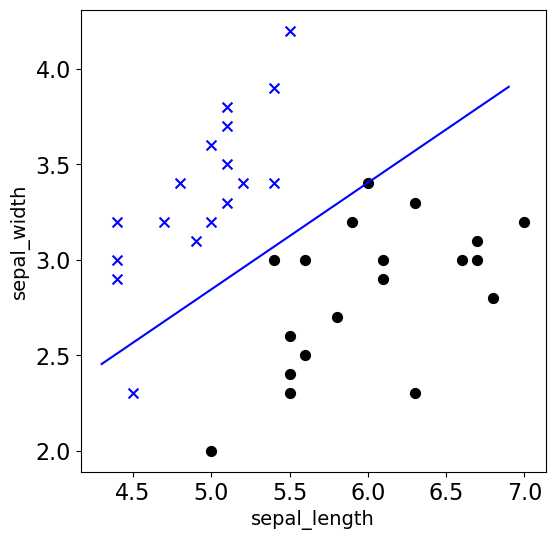

In [48]:
plt.figure(figsize=(6,6))

# 산점도 표시
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', s=50, label='class 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', s=50, label='class 1')

# 산점도에 경계선(결정경계 직선)을 추가  : y = 0.56*x + 0.05  
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

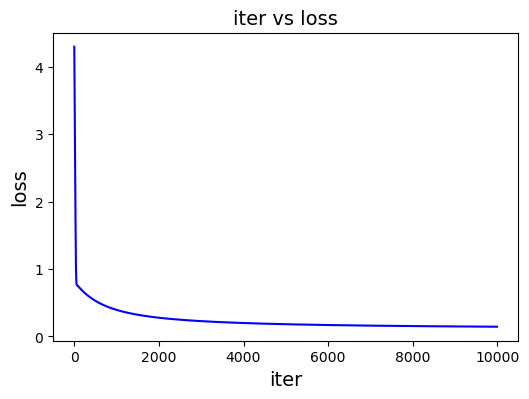

In [49]:
# 학습 곡선 표시 (손실 함수)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

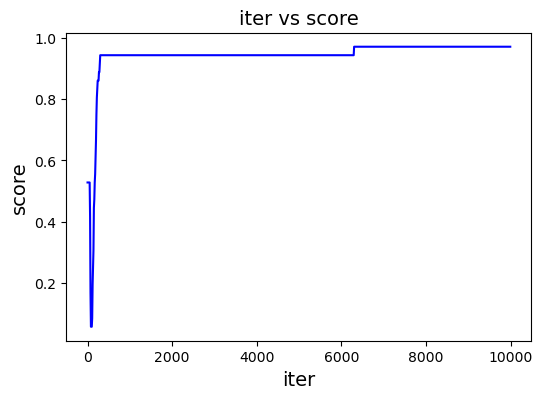

In [50]:
# 학습 곡선 표시 (정확도 score)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.title('iter vs score', fontsize=14)
plt.show()